In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'1.13.1'

In [4]:
mnist=tf.keras.datasets.mnist
#A dataset which consists of 28x28 handwritten images of numbers from 0-9

In [12]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


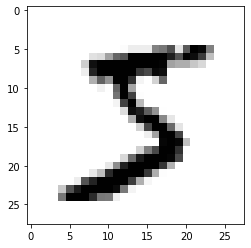

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
#cm=color map

In [13]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

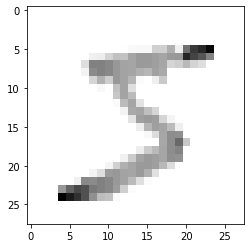

In [14]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [23]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2565 - acc: 0.9264
Epoch 2/3
60000/60000 [==============================] - 8s 140us/sample - loss: 0.1040 - acc: 0.9680
Epoch 3/3
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0727 - acc: 0.9766


In [25]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0910 - acc: 0.9716
0.0909861275861971 0.9716


In [26]:
model.save('number_identification.model')

In [27]:
new_model=tf.keras.models.load_model('number_identification.model')
predictions=new_model.predict(x_test)

In [28]:
print(predictions)

[[9.6938478e-11 5.7555631e-08 8.1845610e-07 ... 9.9998975e-01
  4.7436322e-09 1.0571204e-08]
 [6.2678422e-09 2.8102717e-04 9.9968243e-01 ... 1.1123163e-07
  5.5532423e-06 1.4323507e-11]
 [1.9617225e-07 9.9860317e-01 6.9879738e-05 ... 2.0902244e-04
  9.0650766e-04 1.0736111e-06]
 ...
 [8.4042240e-09 1.2476115e-06 1.4632863e-07 ... 7.7557335e-05
  2.6991002e-06 1.7481833e-04]
 [9.9378813e-06 7.6379598e-07 1.9380154e-08 ... 1.1586145e-06
  1.1760305e-03 5.9940945e-08]
 [5.3461854e-06 1.0450735e-07 1.8186158e-07 ... 2.2415396e-09
  3.5544409e-07 3.8062172e-08]]


In [30]:
import numpy as np
print(np.argmax(predictions[0]))

7


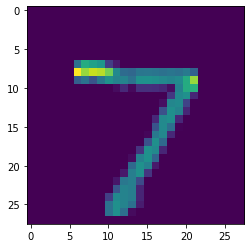

In [31]:
plt.imshow(x_test[0])
plt.show()

2


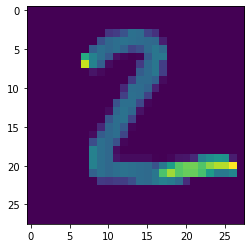

In [32]:
print(np.argmax(predictions[1]))
plt.imshow(x_test[1])
plt.show()

1


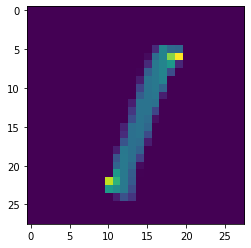

In [36]:
print(np.argmax(predictions[5]))
plt.imshow(x_test[5])
plt.show()

0


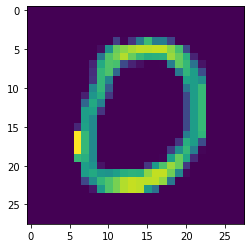

In [37]:
print(np.argmax(predictions[10]))
plt.imshow(x_test[10])
plt.show()